<a href="https://colab.research.google.com/github/matthewarthur/kaggle_various/blob/master/kaggle_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install torchvision

    100% |████████████████████████████████| 61kB 2.9MB/s 
    100% |████████████████████████████████| 2.0MB 11.9MB/s 
    100% |████████████████████████████████| 591.8MB 29kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61f04000 @  0x7fa8258052a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [5]:
!pip install fastai

    100% |████████████████████████████████| 153kB 8.4MB/s 
    100% |████████████████████████████████| 112kB 28.3MB/s 
  Running setup.py bdist_wheel for nvidia-ml-py3 ... - done
  Stored in directory: /root/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
  Running setup.py bdist_wheel for bottleneck ... - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/f2/bf/ec/e0f39aa27001525ad455139ee57ec7d0776fe074dfd78c97e4
Successfully built nvidia-ml-py3 bottleneck


In [6]:
!pip install kaggle

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"matthewarthur","key":"5260552adff43f7577335a272a550902"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 13.6MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 30.4MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 63.2MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 10.7MB/s]


In [11]:
!ls

data_description.txt  sample_data	     test.csv
kaggle.json	      sample_submission.csv  train.csv


In [0]:
from fastai.tabular import *  # Quick accesss to tabular functionality


In [0]:
!mkdir homeprice
!echo "test" > homeprice/test.txt

import os
os.chdir('..')


In [46]:
!ls
!pwd

data_description.txt  kaggle.json  sample_submission.csv  train.csv
homeprice	      sample_data  test.csv
/content


In [0]:
path = 'content/'

In [13]:
df1 = pd.read_csv('train.csv')
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:

df = pd.read_csv('train.csv', usecols=['Street', 'LotShape', 'SalePrice', 'LotArea', 'SaleCondition', 'LotFrontage', 'MSZoning', 'Utilities', 'YrSold'])
df.head()


In [70]:
df_test = pd.read_csv('train.csv', usecols=['Street', 'LotShape', 'SalePrice', 'LotArea', 'SaleCondition', 'LotFrontage', 'MSZoning', 'Utilities', 'YrSold'])
df_test.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,Utilities,YrSold,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,AllPub,2008,Normal,208500
1,RL,80.0,9600,Pave,Reg,AllPub,2007,Normal,181500
2,RL,68.0,11250,Pave,IR1,AllPub,2008,Normal,223500
3,RL,60.0,9550,Pave,IR1,AllPub,2006,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,AllPub,2008,Normal,250000


In [18]:
len(df)

1460

In [0]:
procs = [FillMissing, Categorify, Normalize]


In [0]:
valid_idx = [1200, len(df)-1]

In [0]:
dep_var = 'SalePrice'
cat_vars = ['Street', 'LotShape', 'SaleCondition', 'MSZoning', 'Utilities', 'YrSold']
cont_vars = ['LotArea', 'LotFrontage']


In [0]:
#data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names, cont_vars=cont_vars, test_df='dftest')

In [26]:
dftest = pd.read_csv('test.csv', usecols=['Street', 'LotShape', 'LotArea', 'SaleCondition', 'LotFrontage', 'MSZoning', 'Utilities', 'YrSold'])
len(dftest)

1459

In [27]:
dftest.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,Utilities,YrSold,SaleCondition
0,RH,80.0,11622,Pave,Reg,AllPub,2010,Normal
1,RL,81.0,14267,Pave,IR1,AllPub,2010,Normal
2,RL,74.0,13830,Pave,IR1,AllPub,2010,Normal
3,RL,78.0,9978,Pave,IR1,AllPub,2010,Normal
4,RL,43.0,5005,Pave,IR1,AllPub,2010,Normal


In [0]:
#data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs, cont_vars = cont_vars, cat_names=cat_names)
test_df = dftest
data = (TabularDataBunch.from_df(path=path, df=df, dep_var=dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names, cont_names=cont_vars))
        
#TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)        
#        .label_from_df(cols=dep_var, label_cls=FloatList, log=False)
#                   .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_names, cont_vars=cont_vars)))
#                   .databunch())

#                   .split_by_idx(valid_idx)

#print(data.train_ds.cont_vars

In [0]:
#(cat_x,cont_x),y = next(iter(data.train_dl))
#for o in (cat_x, cont_x, y): print(to_np(o[:5]))

In [0]:
learn = tabular_learner(data, layers=[200, 100], metrics = exp_rmspe)

In [0]:
#learn

In [0]:
learn.fit_one_cycle(5, 1e-5)


epoch,train_loss,valid_loss,exp_rmspe
1,39007870976.000000,32614223872.000000,nan
2,39066517504.000000,32614234112.000000,nan
3,39337578496.000000,32614236160.000000,nan
4,39253942272.000000,32614232064.000000,nan
5,39183736832.000000,32614215680.000000,nan


In [0]:
#predtest = learn.predict(dftest.iloc[3])

In [0]:
#pred

In [0]:
preds = learn.get_preds(ds_type='Test')

In [0]:
type(preds)

list

In [0]:
len(preds[1])

1458

In [0]:
y = np.arange(1458)
y = y + 1461
y

array([1461, 1462, 1463, 1464, ..., 2915, 2916, 2917, 2918])

In [0]:
results = preds[1].numpy()

type(results)

numpy.ndarray

In [0]:
results.shape

(1458,)

In [0]:
results = np.asarray(results)

In [0]:
final = np.column_stack((y,results))
final = final.astype(int)
print(final.size)
final[:, :]

2916


array([[  1461, 181500],
       [  1462, 223500],
       [  1463, 140000],
       [  1464, 250000],
       ...,
       [  2915, 175000],
       [  2916, 210000],
       [  2917, 266500],
       [  2918, 142125]])

In [0]:
np.savetxt("submission1.csv", final, header="Id,SalePrice", delimiter=",",comments='', fmt='%i')

In [0]:
!ls

data_description.txt  models	   sample_submission.csv  test.csv
kaggle.json	      sample_data  submission1.csv	  train.csv


In [0]:
from google.colab import files
files.download('y_pred_test.csv') 

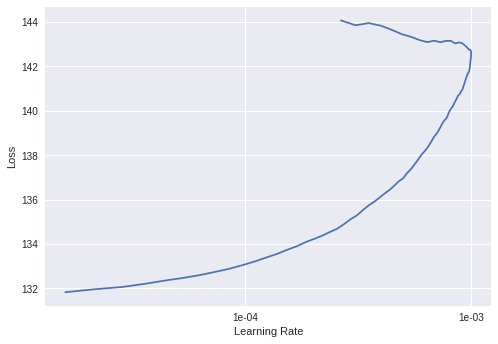

In [0]:
learn.recorder.plot()


In [0]:
Id = dftest.Id
#df_test = df_test[columns]
ans = np.stack((Id,np.exp(learn.predict(dftest))),axis= 1)

In [0]:
df.info()

In [61]:
df.describe()

,LotFrontage,LotArea,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,2007.815753,180921.195890
std,24.284752,9981.264932,1.328095,79442.502883
min,21.000000,1300.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,2007.000000,129975.000000
50%,69.000000,9478.500000,2008.000000,163000.000000
75%,80.000000,11601.500000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,755000.000000


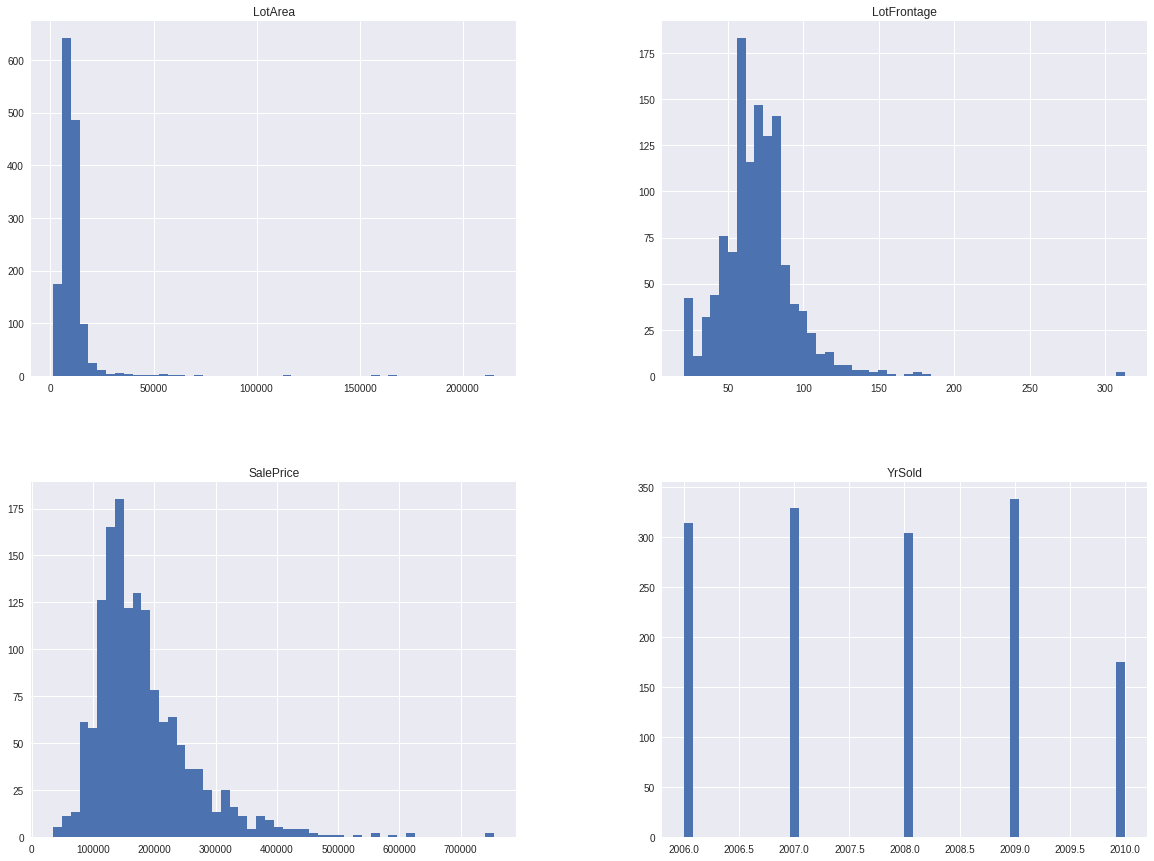

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [64]:
corr_matrix = df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice      1.000000
LotFrontage    0.351799
LotArea        0.263843
YrSold        -0.028923
Name: SalePrice, dtype: float64

In [0]:
!pip install -U scikit-learn

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df[['Street', 'LotShape', 'SaleCondition', 'MSZoning', 'Utilities', 'YrSold','LotArea', 'LotFrontage']]
Y = df['SalePrice']


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [0]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline

In [12]:
df1 = pd.read_csv('train.csv')
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df = pd.read_csv('train.csv', usecols=['Street', 'LotShape', 'SalePrice', 'LotArea', 'SaleCondition', 'LotFrontage', 'MSZoning', 'Utilities', 'YrSold'])
df.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,Utilities,YrSold,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,AllPub,2008,Normal,208500
1,RL,80.0,9600,Pave,Reg,AllPub,2007,Normal,181500
2,RL,68.0,11250,Pave,IR1,AllPub,2008,Normal,223500
3,RL,60.0,9550,Pave,IR1,AllPub,2006,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,AllPub,2008,Normal,250000


In [71]:
df_test = pd.read_csv('test.csv', usecols=['Street', 'LotShape', 'LotArea', 'SaleCondition', 'LotFrontage', 'MSZoning', 'Utilities', 'YrSold'])
df_test.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,Utilities,YrSold,SaleCondition
0,RH,80.0,11622,Pave,Reg,AllPub,2010,Normal
1,RL,81.0,14267,Pave,IR1,AllPub,2010,Normal
2,RL,74.0,13830,Pave,IR1,AllPub,2010,Normal
3,RL,78.0,9978,Pave,IR1,AllPub,2010,Normal
4,RL,43.0,5005,Pave,IR1,AllPub,2010,Normal


In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
Utilities        1460 non-null object
YrSold           1460 non-null int64
SaleCondition    1460 non-null object
SalePrice        1460 non-null int64
dtypes: float64(1), int64(3), object(5)
memory usage: 102.7+ KB
None


In [72]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 8 columns):
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
Utilities        1457 non-null object
YrSold           1459 non-null int64
SaleCondition    1459 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 91.3+ KB
None


In [34]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 0 to 1459
Data columns (total 28 columns):
LotArea                  1460 non-null float64
LotFrontage              1201 non-null float64
LotShape                 1460 non-null object
LotShape_IR1             1460 non-null float64
LotShape_IR2             1460 non-null float64
LotShape_IR3             1460 non-null float64
LotShape_Reg             1460 non-null float64
MSZoning                 1460 non-null object
MSZoning_C (all)         1460 non-null float64
MSZoning_FV              1460 non-null float64
MSZoning_RH              1460 non-null float64
MSZoning_RL              1460 non-null float64
MSZoning_RM              1460 non-null float64
SaleCondition            1460 non-null object
SaleCondition_Abnorml    1460 non-null float64
SaleCondition_AdjLand    1460 non-null float64
SaleCondition_Alloca     1460 non-null float64
SaleCondition_Family     1460 non-null float64
SaleCondition_Normal     1460 non-null float64
Sal

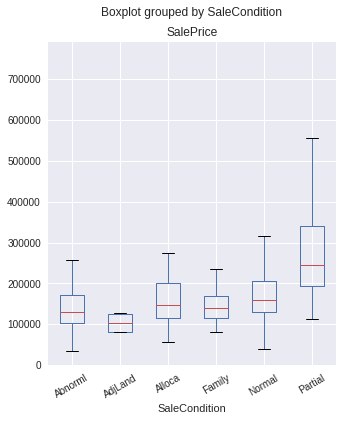

In [15]:
df.boxplot('SalePrice','SaleCondition',rot = 30,figsize=(5,6))


In [0]:
cat_df_test = df_test.select_dtypes(include=['object']).copy()

In [0]:
cat_df = df.select_dtypes(include=['object']).copy()

In [18]:
cat_df.head()

,MSZoning,Street,LotShape,Utilities,SaleCondition
0,RL,Pave,Reg,AllPub,Normal
1,RL,Pave,Reg,AllPub,Normal
2,RL,Pave,IR1,AllPub,Normal
3,RL,Pave,IR1,AllPub,Abnorml
4,RL,Pave,IR1,AllPub,Normal


In [74]:
cat_df_test.head()

,MSZoning,Street,LotShape,Utilities,SaleCondition
0,RH,Pave,Reg,AllPub,Normal
1,RL,Pave,IR1,AllPub,Normal
2,RL,Pave,IR1,AllPub,Normal
3,RL,Pave,IR1,AllPub,Normal
4,RL,Pave,IR1,AllPub,Normal


In [75]:
print(cat_df_test.isnull().values.sum())


6


In [20]:
print(cat_df['SaleCondition'].value_counts())


Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


In [0]:
cat_df = pd.get_dummies(cat_df)
cat_df_test = pd.get_dummies(cat_df_test)

In [0]:
df_new=pd.concat([df, cat_df], axis=1)
df_new_test=pd.concat([df_test, cat_df_test], axis=1)

In [0]:
cat_df.head()

In [0]:
#df_new = df_new.drop(['Street'], axis=1)
df_new_test = df_new_test.drop(['Street', 'MSZoning', 'Street', 'LotShape','Utilities','SaleCondition'], axis=1)

In [114]:
df_new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 21 columns):
LotFrontage              1232 non-null float64
LotArea                  1459 non-null int64
YrSold                   1459 non-null int64
MSZoning_C (all)         1459 non-null uint8
MSZoning_FV              1459 non-null uint8
MSZoning_RH              1459 non-null uint8
MSZoning_RL              1459 non-null uint8
MSZoning_RM              1459 non-null uint8
Street_Grvl              1459 non-null uint8
Street_Pave              1459 non-null uint8
LotShape_IR1             1459 non-null uint8
LotShape_IR2             1459 non-null uint8
LotShape_IR3             1459 non-null uint8
LotShape_Reg             1459 non-null uint8
Utilities_AllPub         1459 non-null uint8
SaleCondition_Abnorml    1459 non-null uint8
SaleCondition_AdjLand    1459 non-null uint8
SaleCondition_Alloca     1459 non-null uint8
SaleCondition_Family     1459 non-null uint8
SaleCondition_Normal     1459 non-nu

In [0]:
#df_new_test.dropna(inplace=True)
#df_new.dropna(inplace=True)
df_new = df_new.fillna(0)
df_new_test = df_new_test.fillna(0)

In [121]:
X = df_new[['LotFrontage', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2','LotShape_IR3','LotShape_Reg', 'Utilities_AllPub','SaleCondition_Abnorml', 'SaleCondition_AdjLand','SaleCondition_Alloca','SaleCondition_Family','SaleCondition_Normal','SaleCondition_Partial']]
Y = df_new['SalePrice']

X.head()

,LotFrontage,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Utilities_AllPub,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,2008,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
1,80.0,2007,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,68.0,2008,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0
3,60.0,2006,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0
4,84.0,2008,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [123]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.2454


In [0]:
X_test2 = df_new_test[['LotFrontage', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2','LotShape_IR3','LotShape_Reg', 'Utilities_AllPub','SaleCondition_Abnorml', 'SaleCondition_AdjLand','SaleCondition_Alloca','SaleCondition_Family','SaleCondition_Normal','SaleCondition_Partial']]


In [125]:
y_pred_test = regressor.predict(X_test2)
y_pred_test.shape


(1459,)

In [0]:
np.savetxt("y_pred_test.csv", y_pred_test, delimiter=",")


In [0]:
from google.colab import files
files.download('y_pred_test.csv') 

In [66]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 63581.1989


In [67]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))


Gradient Boosting R squared": 0.2960


In [69]:
!ls

data_description.txt  sample_data	     test.csv
kaggle.json	      sample_submission.csv  train.csv


In [85]:
y_pred = regressor.predict(X_test)

ValueError: ignored